In [33]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# Copyright (c) 2022 Milan Ondrašovič <milan.ondrasovic@gmail.com>
#
# MIT License
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import config as cfg
from dataset import (
    load_dataset_and_extract_features, bin_class_labeL_getter
)
from visual import plot_linear_feature_importance

plt.style.use('dark_background')

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
label_names = ['no', 'yes']
label_getter = bin_class_labeL_getter

In [35]:
features_train, labels_train = load_dataset_and_extract_features(
    cfg.TRAIN_DIR_PATH, label_getter
)
features_test, labels_test = load_dataset_and_extract_features(
    cfg.TEST_DIR_PATH, label_getter
)

features_train.shape, features_test.shape

100%|██████████| 319/319 [00:21<00:00, 14.68it/s]


((1298, 192), (319, 192))

In [36]:
model = LogisticRegression(max_iter=5000, random_state=731995)
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', model)
    ],
    verbose=True
)
pipeline.fit(features_train, labels_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(max_iter=5000, random_state=731995))],
         verbose=True)

In [37]:
labels_pred = pipeline.predict(features_test)
print(classification_report(labels_test, labels_pred, target_names=label_names))

              precision    recall  f1-score   support

          no       1.00      0.97      0.98        29
         yes       1.00      1.00      1.00       290

    accuracy                           1.00       319
   macro avg       1.00      0.98      0.99       319
weighted avg       1.00      1.00      1.00       319



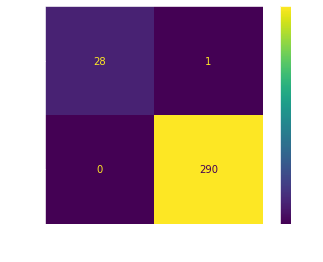

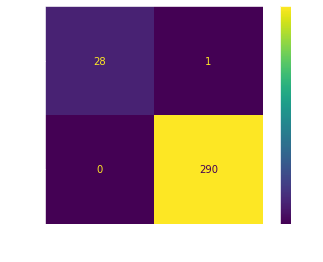

In [38]:
disp = ConfusionMatrixDisplay.from_predictions(
    labels_test, labels_pred, display_labels=label_names
)
disp.plot()
plt.savefig('CM_bin_linear_classifer.png', dpi=200)

E:\venvs\siam-mot\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


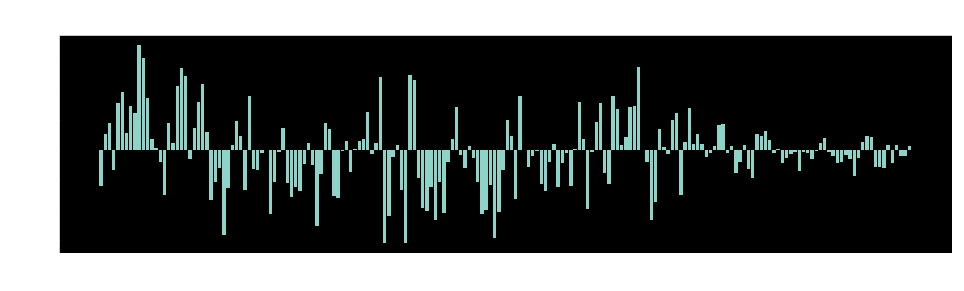

In [39]:
fig = plot_linear_feature_importance(model)
fig.show()